# Q1

# CLIP

## 1. & 2.

In [13]:
# %pip install transformers
# %pip install torchvision
# %pip install torch
# %pip install pillow

In [14]:
# from transformers import CLIPProcessor, CLIPModel
# from PIL import Image
# import torch

# # Load model and processor
# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# # Load and prepare the image
# image = Image.open("CLIP_image.png")

# # Define candidate texts
# texts = ["a photo of a dog", "a photo of a cat", "a photo of a horse"]

# # Preprocess inputs
# inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# # Forward pass
# outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image  # image-text similarity scores
# probs = logits_per_image.softmax(dim=1)      # normalized probabilities

# print("Similarity probabilities:", probs)

## 3.

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Load model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load image
image = Image.open("sample_image.jpg").convert("RGB")

# 10 random textual descriptions
text_descriptions = [
    "a man holding a giant dog",
    "a man in a white shirt and gray pants holding a massive dog in his arms",
    "a man in casual clothing holding a very large brown dog on a leash",
    "a dog sitting on a couch",
    "a woman playing with her cat",
    "a professionally dressed man in an office petting a golden retriever",
    "a bookshelf full of books",
    "a blurry photo of a man trying to restrain a dog during a dog show",
    "a drawing of a man and a dog in a surreal fantasy landscape",
    "a man feeding his pet dog while sitting on a wooden floor near a fireplace"
]

# Preprocess and forward pass
inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Get probabilities
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

for text, score in zip(text_descriptions, probs[0]):
    print(f"{text}: {score.item():.4f}")

a man holding a giant dog: 0.0761
a man in a white shirt and gray pants holding a massive dog in his arms: 0.9207
a man in casual clothing holding a very large brown dog on a leash: 0.0022
a dog sitting on a couch: 0.0002
a woman playing with her cat: 0.0002
a professionally dressed man in an office petting a golden retriever: 0.0003
a bookshelf full of books: 0.0000
a blurry photo of a man trying to restrain a dog during a dog show: 0.0000
a drawing of a man and a dog in a surreal fantasy landscape: 0.0001
a man feeding his pet dog while sitting on a wooden floor near a fireplace: 0.0003


# CLIPS

## 4.

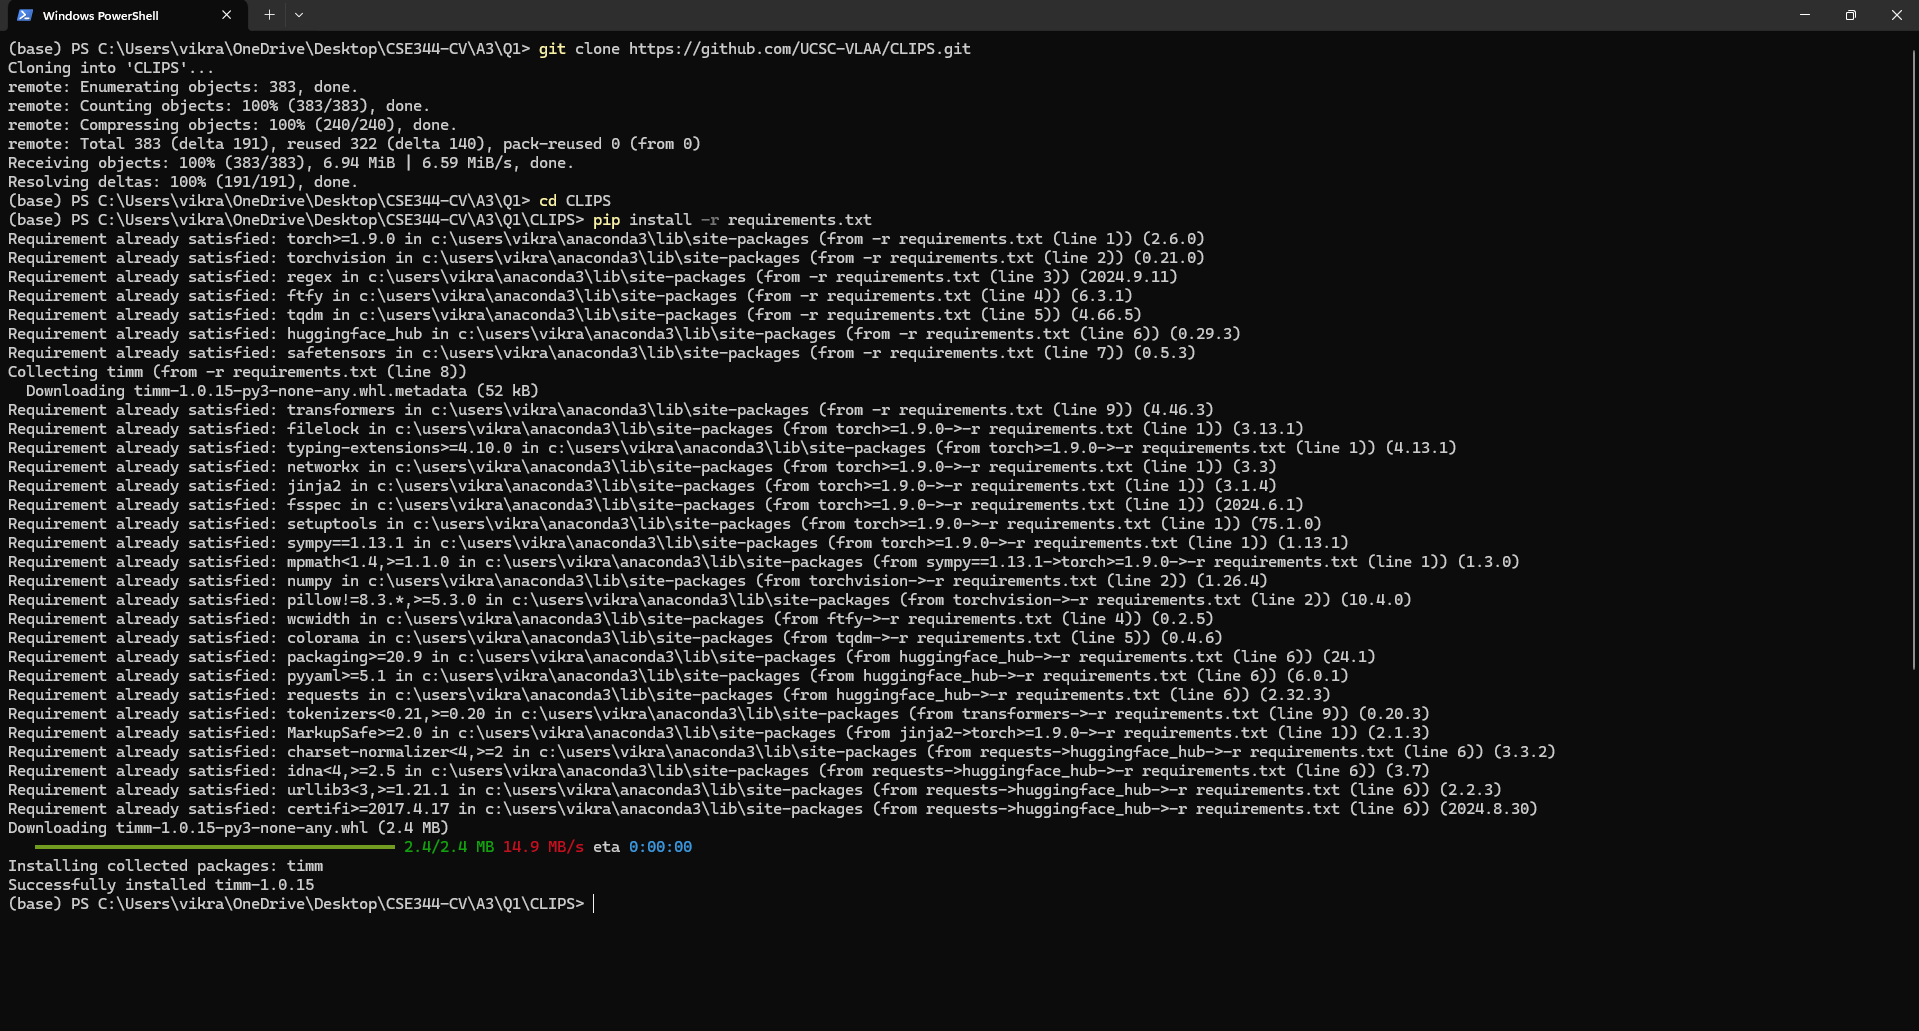

## 5.

In [10]:
# %pip install open_clip_torch torch

In [11]:
# import torch
# import torch.nn.functional as F
# from urllib.request import urlopen
# from PIL import Image
# from open_clip import create_model_from_pretrained, get_tokenizer

# model, preprocess = create_model_from_pretrained('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-Recap-DataComp-1B')
# tokenizer = get_tokenizer('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-Recap-DataComp-1B')

# image = Image.open(urlopen(
#     'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
# ))
# image = preprocess(image).unsqueeze(0)

# text = tokenizer(["a diagram", "a dog", "a cat", "a beignet"], context_length=model.context_length)

# with torch.no_grad(), torch.cuda.amp.autocast():
#     image_features = model.encode_image(image)
#     text_features = model.encode_text(text)
#     image_features = F.normalize(image_features, dim=-1)
#     text_features = F.normalize(text_features, dim=-1)

#     text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# print("Label probs:", text_probs)  # prints: [[0., 0., 0., 1.0]]

## 6.

In [12]:
import torch
import torch.nn.functional as F
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer

# Load model and tokenizer
model, preprocess = create_model_from_pretrained('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-Recap-DataComp-1B')
tokenizer = get_tokenizer('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-Recap-DataComp-1B')

# Load image
image = Image.open("sample_image.jpg").convert("RGB")
image = preprocess(image).unsqueeze(0)

# 10 random textual descriptions
text_descriptions = [
    "a man holding a giant dog",
    "a man in a white shirt and gray pants holding a massive dog in his arms",
    "a man in casual clothing holding a very large brown dog on a leash",
    "a dog sitting on a couch",
    "a woman playing with her cat",
    "a professionally dressed man in an office petting a golden retriever",
    "a bookshelf full of books",
    "a blurry photo of a man trying to restrain a dog during a dog show",
    "a drawing of a man and a dog in a surreal fantasy landscape",
    "a man feeding his pet dog while sitting on a wooden floor near a fireplace"
]

# Tokenize the text
text = tokenizer(text_descriptions, context_length=model.context_length)

# Forward pass
with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features = F.normalize(image_features, dim=-1)
    text_features = F.normalize(text_features, dim=-1)

    # Compute similarity
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Similarity Scores:")
for desc, score in zip(text_descriptions, text_probs[0]):
    print(f"{desc}: {score.item():.4f}")

C:\Users\vikra\AppData\Local\Temp\ipykernel_13980\1218072304.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


Similarity Scores:
a man holding a giant dog: 0.1529
a man in a white shirt and gray pants holding a massive dog in his arms: 0.8466
a man in casual clothing holding a very large brown dog on a leash: 0.0004
a dog sitting on a couch: 0.0000
a woman playing with her cat: 0.0000
a professionally dressed man in an office petting a golden retriever: 0.0000
a bookshelf full of books: 0.0000
a blurry photo of a man trying to restrain a dog during a dog show: 0.0000
a drawing of a man and a dog in a surreal fantasy landscape: 0.0000
a man feeding his pet dog while sitting on a wooden floor near a fireplace: 0.0000
